In [ ]:
# from google.colab import drive
# import os

# drive.mount('/content/drive')

# project_path = '/content/drive/MyDrive/Voice-Classification'
# os.chdir(project_path)

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load processed MFCC features and labels
X_train = np.load('../data/processed/X_train_reduced.npy')
X_test = np.load('../data/processed/X_test_reduced.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

# Check the shapes of loaded data
print("Data Loaded Successfully:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data Loaded Successfully:
X_train shape: (85087, 17)
X_test shape: (21272, 17)
y_train shape: (85087,)
y_test shape: (21272,)


### Logistic Regression

In [5]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.5667074088003009


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Reducing to 2D to plot decision boundary plot

In [13]:
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [14]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_reduced, y_train)


y_pred = log_reg.predict(X_test_reduced)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.5474332455810456


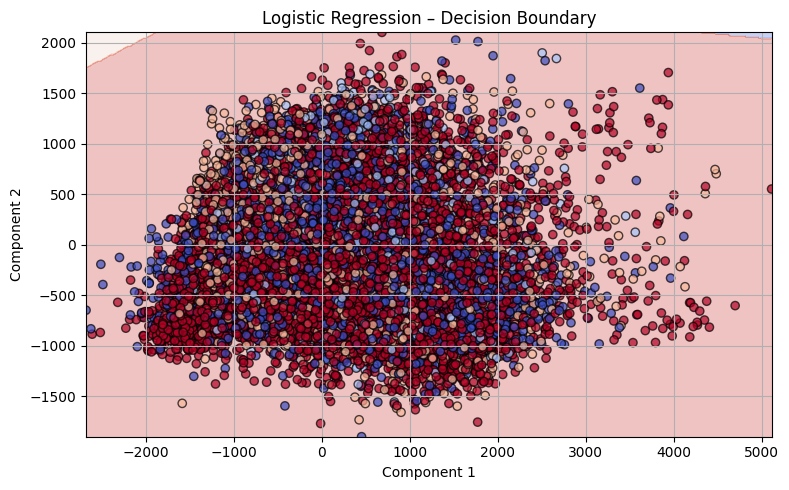

In [12]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', alpha=0.7)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot using test set
plot_decision_boundary(log_reg, X_test_reduced, y_test, "Logistic Regression – Decision Boundary")

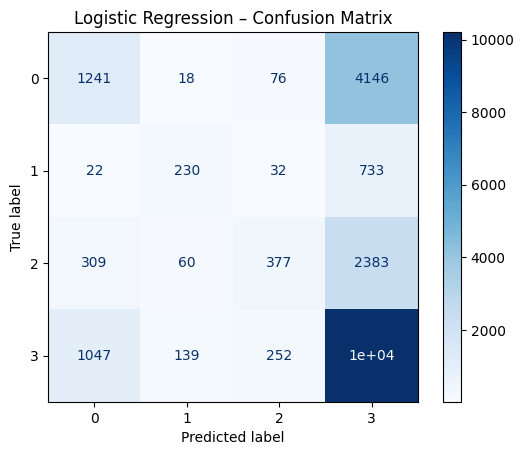

In [5]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Logistic Regression – Confusion Matrix")
plt.show()


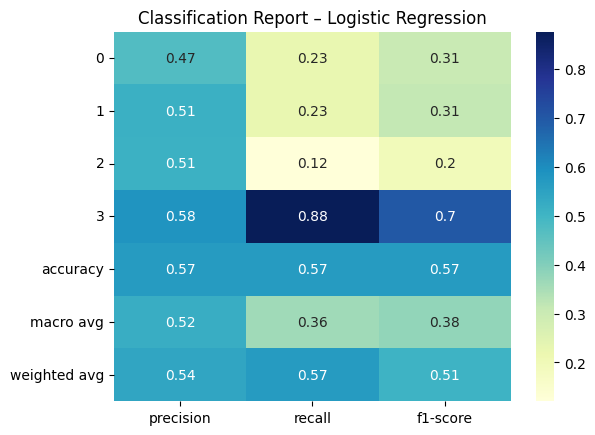

In [6]:
# Classification Report
report = classification_report(y_test, y_pred_logreg, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title("Classification Report – Logistic Regression")
plt.show()

### Support Vector Machines

In [ ]:
# Support Vector Machine with scaled data
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


In [ ]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Random Forest – Confusion Matrix")
plt.show()

NameError: name 'y_pred_svm' is not defined

### Random Forest Classification

In [8]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.6756299360661903


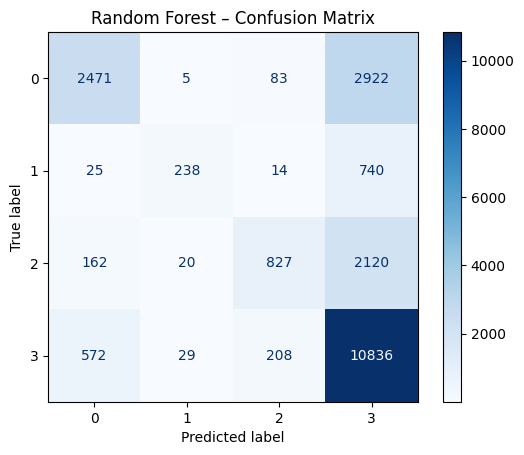

In [9]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Random Forest – Confusion Matrix")
plt.show()

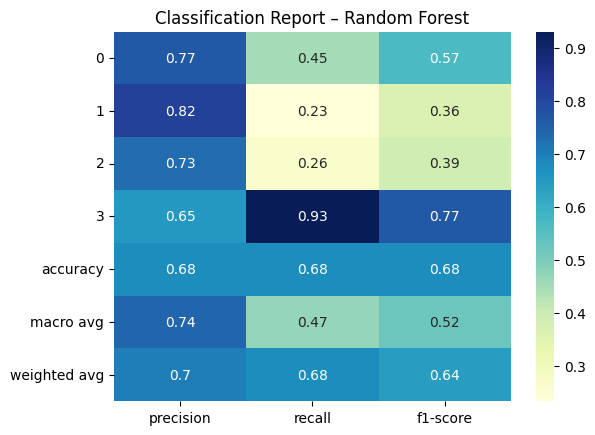

In [10]:
# Classification Report
report = classification_report(y_test, y_pred_rf, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title("Classification Report – Random Forest")
plt.show()

### KNN Classification

In [11]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.6540052651372696


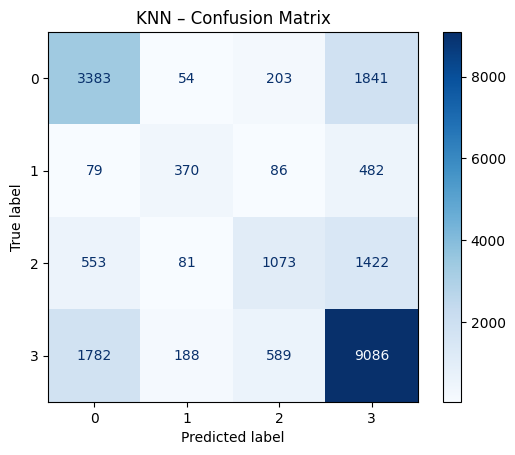

In [12]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("KNN – Confusion Matrix")
plt.show()

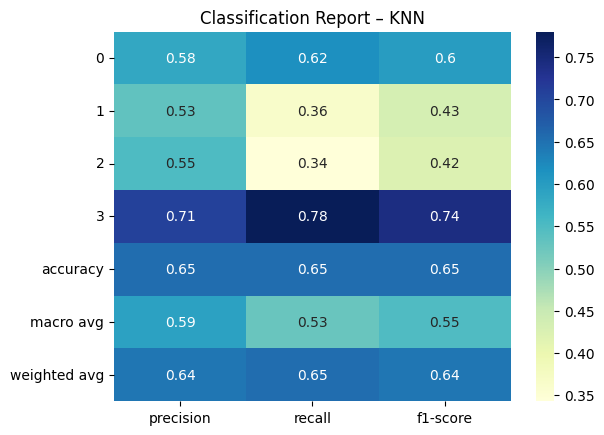

In [13]:
# Classification Report
report = classification_report(y_test, y_pred_knn, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title("Classification Report – KNN")
plt.show()

### Bagging

In [14]:
# Base estimator (you can also use LogisticRegression or others)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))


Bagging Accuracy: 0.6733264385107183


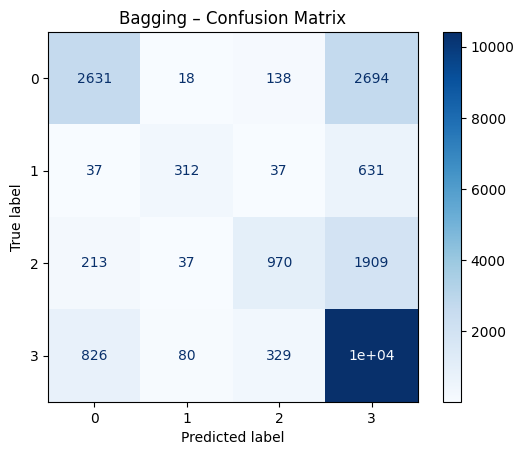

In [15]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_bagging)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Bagging – Confusion Matrix")
plt.show()

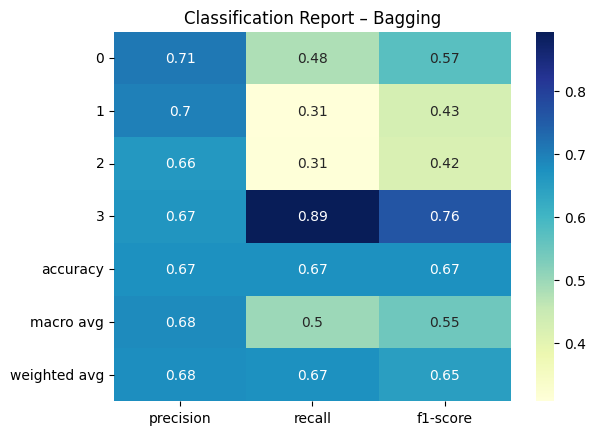

In [16]:
# Classification Report
report = classification_report(y_test, y_pred_bagging, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title("Classification Report – Bagging")
plt.show()


### AdaBoost

In [17]:
adaboost = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.5473862354268522


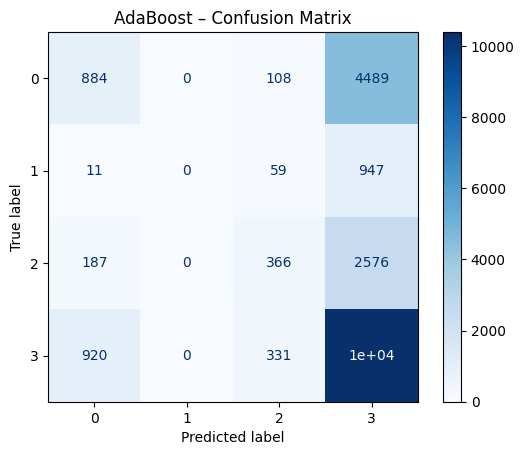

In [18]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("AdaBoost – Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


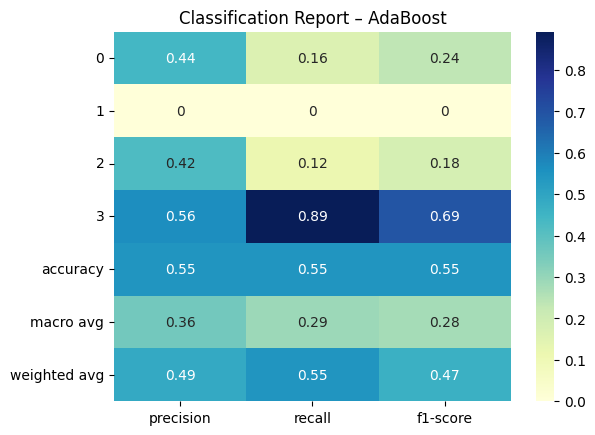

In [19]:
# Classification Report
report = classification_report(y_test, y_pred_ada, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title("Classification Report – AdaBoost")
plt.show()


### XGBoost

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))



XGBoost Accuracy: 0.6616679202707785


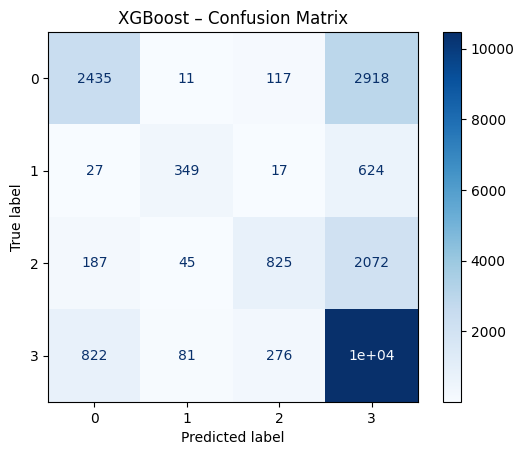

In [21]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("XGBoost – Confusion Matrix")
plt.show()

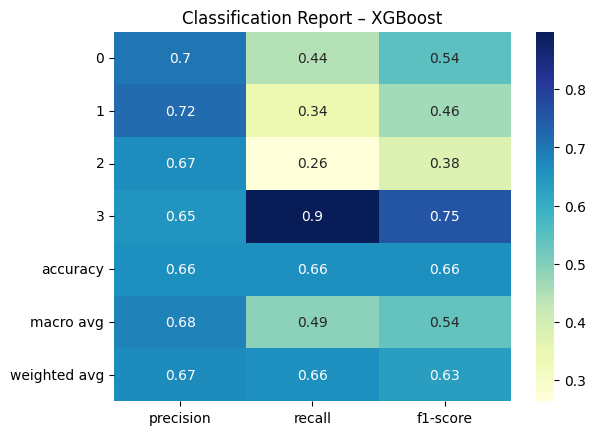

In [22]:
# Classification Report
report = classification_report(y_test, y_pred_xgb, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='YlGnBu')
plt.title("Classification Report – XGBoost")
plt.show()


### Overall Model Accuracies

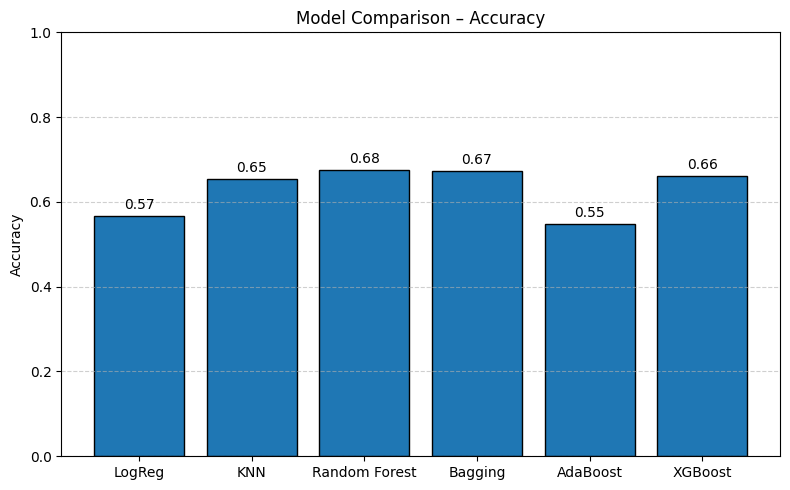

In [23]:
models = ['LogReg', 'KNN', 'Random Forest', 'Bagging', 'AdaBoost', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_bagging),
    accuracy_score(y_test, y_pred_ada),
    accuracy_score(y_test, y_pred_xgb)
]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, edgecolor='black')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Comparison – Accuracy")

# Annotate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Model Performance Summary

#### Accuracy Comparison

| Model               | Accuracy |
|---------------------|----------|
| Logistic Regression | 0.57     |
| K-Nearest Neighbors | 0.65     |
| Random Forest       | 0.68     |
| Bagging             | 0.67     |
| AdaBoost            | 0.55     |
| XGBoost             | 0.66     |
| SVM (RBF Kernel)    | 0.67     |

**Best overall accuracy**: **Random Forest (0.68)**

**Weakest performance**: **AdaBoost (0.55)**



#### Classification Reports – Key Observations

##### **Logistic Regression**
- Performs decently only on class `3` (recall = 0.88, f1 = 0.70)
- Struggles on all other classes, especially class `2` (f1 = 0.19)
- Macro avg F1-score: **0.38**

##### **K-Nearest Neighbors**
- Consistent but moderate across classes
- Best on class `3` (f1 = 0.74)
- Macro avg F1-score: **0.55**

##### **Random Forest**
- Strongest class-wise balance
- Highest precision overall (macro avg = 0.74)
- Best recall and f1 for class `3` (recall = 0.93, f1 = 0.77)
- Macro avg F1-score: **0.52**

##### **Bagging**
- Similar to Random Forest, with slight variations
- Balanced across all classes, good f1 for class `3` (0.76)
- Macro avg F1-score: **0.55**

##### **AdaBoost**
- Very low performance on classes `1` and `2` (recall = 0.00, 0.12)
- Works well only on class `3` (recall = 0.89, f1 = 0.69)
- Macro avg F1-score: **0.28** → significantly underperforms

##### **XGBoost**
- Strong f1-scores for class `3` (0.75) and decent precision across all
- Balanced precision across classes, with macro avg F1-score: **0.54**

##### **SVM**
- Overall accuracy = 0.67
- Performs comparably to Bagging and XGBoost
- Good choice for balanced multi-class problems


#### Conclusion

- **Random Forest** stands out with the highest overall performance.
- **KNN, Bagging, SVM, and XGBoost** follow closely with good balance.
- **AdaBoost** underperforms significantly — poor recall and f1 for most classes.
- **Logistic Regression** lacks consistency but performs reasonably on one class.